In [ ]:
#import packages
import pandas as pd
import numpy as np
import requests
from datetime import datetime, date
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates

In [76]:
#get movies
df_movies = pd.read_json('movies.json', convert_dates=['birthdate'])
df_movies.set_index("id", inplace=True)
df_movies

,title,year,duration
id,,,
5257,Excuse Me,1915,50.0
6366,Anton the Terrible,1916,50.0
8351,The Mysterious Mrs. Musslewhite,1917,50.0
8384,On the Level,1917,50.0
8642,The Sunset Trail,1917,50.0
...,...,...,...
11885402,Dan Aykroyd and Tom Hanks: City of Crime,1987,NaN
11911992,Bleu de Chanel: The Film,2018,1.0
12771922,Neil Cicierega: Vivid Memories Turn to Fantasi...,2014,3.0


In [ ]:
#get stars
df_stars = pd.read_json('stars.json', convert_dates=['birthdate'])
df_stars.set_index("id", inplace=True)
df_stars

# Stars by birthyear

In [8]:
df_stars_by_birthyear = pd.read_json('stars_born_1930.json', convert_dates=['birthdate']).set_index('name')
df_stars_by_birthyear

,birthdate,id
name,,
Abel Fernandez,1930-01-01,273359
Alejandro Rey,1930-01-01,721031
Alfie Curtis,1930-01-01,193238
Alvin Greenman,1930-01-01,339141
Angela Paton,1930-01-01,665708
...,...,...
Warren Vanders,1930-01-01,888845
Will Hutchins,1930-01-01,404298
William Joyce,1930-01-01,431499


# Movies by title part

In [13]:
df_movies_by_title_part=pd.read_json('movies_by_title_Fast.json').set_index('title')
df_movies_by_title_part

,year,duration,id
title,,,
Fast & Furious,2009,107,1013752
Fast & Furious 6,2013,130,1905041
Fast & Furious: Supercharged,2015,11,3757982
Fast Five,2011,130,1596343
The Fast and the Furious,2001,106,232500
The Fast and the Furious: Tokyo Drift,2006,104,463985


# Top 10 acteurs

In [72]:
df=pd.read_json('stats_actors_top10.json')
# creation nouvelles colonnes avec le nom des différents attributs
df["birthdate"] = [x["birthdate"] for x in df[0]]
df["name"] = [x["name"] for x in df[0]]
df["id"] = [x["id"] for x in df[0]]
df["movie_count"] = df[1]
df["year_min"] = df[2]
df["year_max"] = df[3]
del df[0]
del df[1]
del df[2]
del df[3]
df.set_index("id")
df_top10_actors=df
df_top10_actors

,birthdate,name,id,movie_count,year_min,year_max
0,1907-05-26,John Wayne,78,172,1926,1976
1,1884-03-16,Harrison Ford,1230,86,1915,1932
2,1930-08-25,Sean Connery,125,73,1954,2012
3,1946-07-06,Sylvester Stallone,230,73,1969,2019
4,1956-07-09,Tom Hanks,158,69,1980,2020
5,1960-10-18,Jean-Claude Van Damme,241,66,1979,2019
6,1930-05-31,Clint Eastwood,142,63,1955,2018
7,1942-07-13,Harrison Ford,148,63,1966,2020
8,1947-07-30,Arnold Schwarzenegger,216,56,1970,2019
9,1968-09-25,Will Smith,226,50,1988,2020


In [73]:
df_top10_actors_movie_count =df_top10_actors[['name','movie_count']].set_index('name')
df_top10_actors_years = df_top10_actors[['name', 'year_min', 'year_max']].set_index('name')

(1900.0, 2025.0)

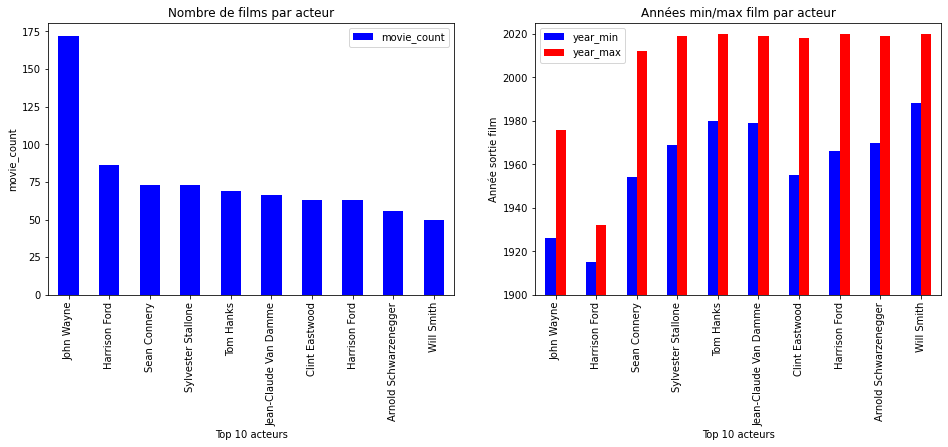

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,5))

df_top10_actors_movie_count.plot(kind="bar", ax=ax1, color='blue')
ax1.set_title("Nombre de films par acteur")
ax1.set_ylabel("movie_count")
ax1.set_xlabel("Top 10 acteurs")

df_top10_actors_years.plot(kind="bar", ax=ax2, color=['blue', 'red'])
ax2.set_title("Années min/max film par acteur")
ax2.set_ylabel("Année sortie film")
ax2.set_xlabel("Top 10 acteurs")
ax2.set_ylim(1900, 2025)


In [82]:
df_count_stars_by_year = df_stars[~df_stars.birthdate.isna()].groupby(pd.Grouper(key='birthdate', freq='Y')).count()
df_count_movies_by_year = df_movies.groupby(pd.Grouper(key='year')).count()[['title']]

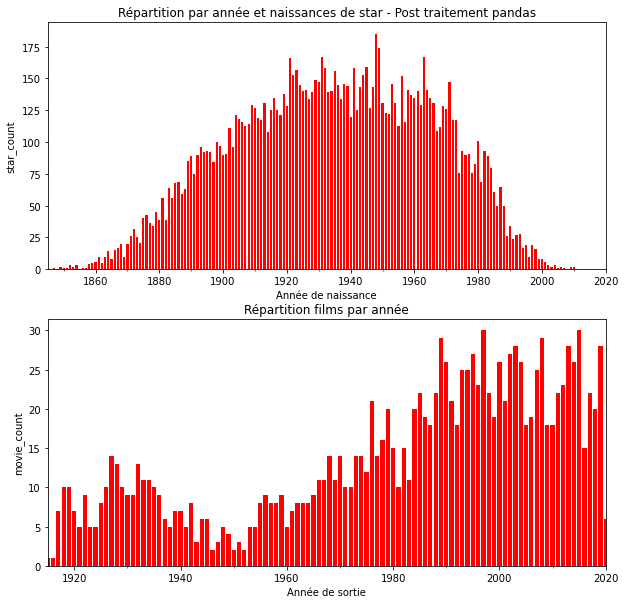

In [84]:
fig, ((ax1, ax2)) = plt.subplots(2, figsize=(10,10))

ax1.bar(df_count_stars_by_year.index, df_count_stars_by_year.name, color='red', width=250)
ax1.set_title("Répartition par année et naissances de star - Post traitement pandas")
ax1.set_xlabel("Année de naissance")
ax1.set_ylabel("star_count")
ax1.set_xlim(datetime(1845,1,1), datetime(2020,1,1))
ax1.xaxis.set_minor_locator(mdates.YearLocator(base=10))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

ax2.bar(df_count_movies_by_year.index, df_count_movies_by_year.title, color='red')
ax2.set_title("Répartition films par année")
ax2.set_xlabel("Année de sortie")
ax2.set_ylabel("movie_count")
ax2.set_xlim(1915, 2020)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(10))

